## 线性模型和梯度下降
* 线性回归可以说是监督学习里面最基础的模型，而梯度下降算法也是深度学习中应用最广泛的优化算法之一。

### 一元线性回归模型
假设有变量 $x_i$ 和目标 $y_i$，每个 i 对应于一个数据点，希望建立一个模型

$$
\hat{y}_i = w x_i + b
$$

$\hat{y}_i$ 是预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

那么如何最小化这个误差呢？这里需要用到**梯度下降**，它非常简单，但是却非常强大

## 梯度下降法
### 梯度
梯度在数学上就是导数，如果是一个多元函数，那么梯度就是偏导数。比如一个函数f(x, y)，那么 f 的梯度就是 

$$
\bigg(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y}\bigg)
$$

可以称为 grad f(x, y) 或者 $\nabla f(x, y)$。具体某一点 $(x_0,\ y_0)$ 的梯度就是 $\nabla f(x_0,\ y_0)$。

下面这个图片是 $f(x) = x^2$ 这个函数在 x=1 处的梯度

![](https://ws3.sinaimg.cn/large/006tNc79ly1fmarbuh2j3j30ba0b80sy.jpg)

梯度有什么意义呢？从几何意义来讲，一个点的梯度值是这个函数变化最快的地方，具体来说，对于函数 f(x, y)，在点  (x0,y0)(x0,y0)  处，沿着梯度  ∇f(x0, y0)∇f(x0, y0)  的方向，函数增加最快，也就是说沿着梯度的方向，我们能够更快地找到函数的极大值点，或者反过来沿着梯度的反方向，我们能够更快地找到函数的最小值点。

### 梯度下降法
有了对梯度的理解，我们就能了解梯度下降法的原理了。上面我们需要最小化这个误差，也就是需要找到这个误差的最小值点，那么沿着梯度的反方向我们就能够找到这个最小值点。

我们可以来看一个直观的解释。比如我们在一座大山上的某处位置，由于我们不知道怎么下山，于是决定走一步算一步，也就是在每走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经到了山脚。当然这样走下去，有可能我们不能走到山脚，而是到了某一个局部的山峰低处。

类比我们的问题，就是沿着梯度的反方向，我们不断改变 w 和 b 的值，最终找到一组最好的 w 和 b 使得误差最小。

在更新的时候，我们需要决定每次更新的幅度，比如在下山的例子中，我们需要每次往下走的那一步的长度，这个长度称为学习率，用 $\eta$ 表示，这个学习率非常重要，不同的学习率都会导致不同的结果，**学习率太小会导致下降非常缓慢，学习率太大又会导致跳动非常明显**，可以看看下面的例子

![](https://ws2.sinaimg.cn/large/006tNc79ly1fmgn23lnzjg30980gogso.gif)

可以看到上面的学习率较为合适，而下面的学习率太大，就会导致不断跳动

最后我们的更新公式就是

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$

通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。

最后可以通过这张图形象地说明一下这个方法

![](https://ws3.sinaimg.cn/large/006tNc79ly1fmarxsltfqj30gx091gn4.jpg)


### 案例一
以下通过一个案例来进一步理解线性回归模型。

In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(2019) ##设置随机数种子，使随机初始化不至于太随机

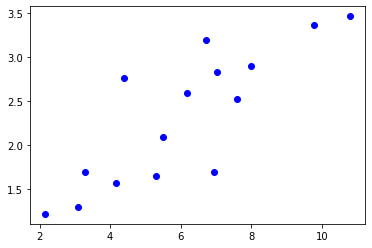

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 画出图像
plt.plot(x_train, y_train, 'bo')

In [3]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [4]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

y_pred = linear_model(x_train)

* 经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样。

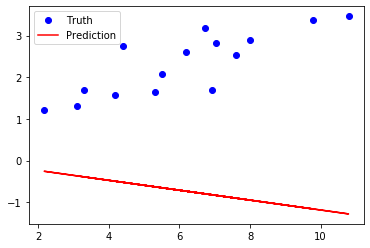

In [5]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='Truth')
plt.plot(x_train.data.numpy(), y_pred.data.numpy(), 'r', label='Prediction')
plt.legend()

In [6]:
## 构造损失函数

def get_loss(y_pred, y_train):
    return torch.mean((y_pred - y_train) ** 2)

loss = get_loss(y_pred, y_train)
print('Initial loss:',loss.item())

Initial loss: 10.23349380493164


In [7]:
# 自动微分
loss.backward()

# 更新一次参数
learning_rate = 1e-2
w.data = w.data - learning_rate * w.grad.data
b.data = b.data - learning_rate * b.grad.data

* 更新完成参数之后，我们再一次看看模型输出的结果

Loss after 1st update: 0.4142104387283325


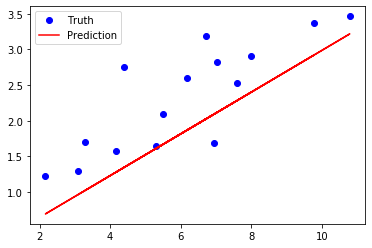

In [8]:
y_pred = linear_model(x_train)
loss_update = get_loss(y_pred,y_train)
print('Loss after 1st update:',loss_update.item()) ## 取出variable的值为scalar用item()

plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='Truth')
plt.plot(x_train.data.numpy(), y_pred.data.numpy(), 'r', label='Prediction')
plt.legend()

* 能够发现更新一次梯度，使得 loss 变小，但还不够好，还需继续多次更新

In [9]:
for epoch in range(10): # 进行 10 次更新
    y_pred = linear_model(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.zero_() # 再次backward()之前一定要归零梯度
    b.grad.zero_() # 再次bakward()之前一定要归零梯度
    loss.backward()
    
    w.data = w.data - learning_rate * w.grad.data # 更新 w
    b.data = b.data - learning_rate * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(epoch, loss.item()))

epoch: 0, loss: 0.4142104387283325
epoch: 1, loss: 0.23218491673469543
epoch: 2, loss: 0.2285148650407791
epoch: 3, loss: 0.22814729809761047
epoch: 4, loss: 0.2278423011302948
epoch: 5, loss: 0.22753994166851044
epoch: 6, loss: 0.22723926603794098
epoch: 7, loss: 0.2269400656223297
epoch: 8, loss: 0.2266424000263214
epoch: 9, loss: 0.22634625434875488


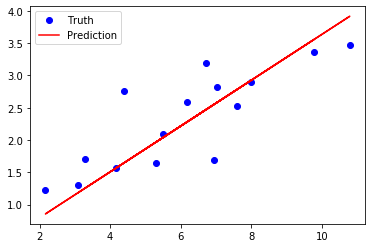

In [10]:
y_pred = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='Truth')
plt.plot(x_train.data.numpy(), y_pred.data.numpy(), 'r', label='Prediction')
plt.legend()

* 经过10次更新，红色的线已经能比较好的拟合蓝色的观测数据了。

### 多项式回归模型
以上的线性回归模型只是用到了数据的线性变换，也即一阶特征。这个模型过于简单，无法拟合比较复杂的关系，所以我们可以考虑使用多项式回归模型，也即考虑更高阶次的特征，模型形式如下：

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$

这里使用了 x 的 3阶作为特征，可以拟合更复杂的关系，同理还有多元回归模型，形式也是一样的，只是除了使用 x，还是更多的变量，比如 y、z 等等，同时他们的 loss 函数和简单的线性回归模型是一致的。

### 案例二
* 首先我们可以先定义一个需要拟合的目标函数，这个函数是个三次的多项式 $y = 0.9 + 0.5x + 3x^2 + 2.4x^3$

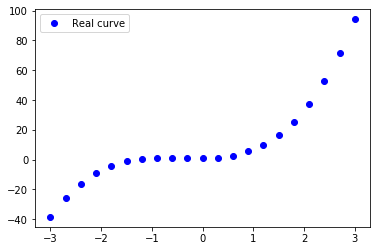

In [25]:
# 画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.3)
y_sample = 0.9 + 0.5 * x_sample + 3 * x_sample ** 2 + 2.4 * x_sample ** 3

plt.plot(x_sample, y_sample, 'bo', label='Truth')
plt.legend()

* 然后构建训练数据集，需要 $X$ 和 $y$，这里的 $X = [x, x^2, x^3]$是三个特征的向量

In [26]:
x_train = np.stack([x_sample ** i for i in range(1,4)],axis=1)
x_train = torch.from_numpy(x_train).float()

y_train = torch.from_numpy(y_sample).float().unsqueeze(1) ## 转换成[N,1]的向量

* 然后定义模型以及需要优化的参数 $W$ 和 $b$

In [27]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

* 我们可以画出没有更新之前的模型和真实的模型之间的对比

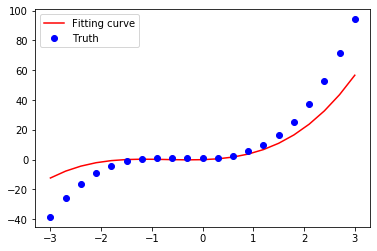

In [28]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='Fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, 'bo', label='Truth')
plt.legend()

* 我们对参数进行50次迭代更新

In [29]:
# 进行 50 次参数更新
learning_rate = 0.001
for epoch in range(50):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    if epoch > 0:  # 第一次backward() 不需要归零梯度
        w.grad.data.zero_()
        b.grad.data.zero_()
    loss.backward()
    
    
    # 更新参数
    w.data = w.data - learning_rate * w.grad.data
    b.data = b.data - learning_rate * b.grad.data
    if (epoch + 1) % 10 == 0:
        print('epoch {}, Loss: {:.5f}'.format(epoch+1, loss.item()))

epoch 10, Loss: 5.45837
epoch 20, Loss: 2.45676
epoch 30, Loss: 1.34942
epoch 40, Loss: 0.85758
epoch 50, Loss: 0.63632


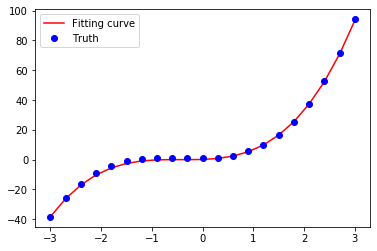

In [30]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='Fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, 'bo', label='Truth')
plt.legend()

* 可以看到经过50次迭代，可以将三次多项式拟合好